In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
# Bisection method
def bisection_method(f, a, b, tol=1e-7, max_iter=100):
    """ Bisection method to find the root of a function. """
    errors = []
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("The function must have different signs at the endpoints a and b.")
    
    for _ in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        errors.append(abs(fc))
        if fc == 0 or (b - a) / 2 < tol:
            return c, errors
        if fa * fc < 0:
            b = c
        else:
            a = c
            fa = fc
    return (a + b) / 2, errors

In [16]:
# Newton-Raphson method
def newton_raphson_method(f, df, x0, tol=1e-7, max_iter=100):
    """ Newton-Raphson method to find the root of a function. """
    errors = []
    x = x0
    for _ in range(max_iter):
        fx, dfx = f(x), df(x)
        if abs(dfx) < tol:
            raise ValueError("Derivative is too small; no convergence.")
        errors.append(abs(fx))
        if abs(fx) < tol:
            return x, errors
        x = x - fx / dfx
    return x, errors

In [17]:

# Test function for x^2 = 2
def f1(x):
    return x**2 - 2.0

def df1(x):
    return 2 * x

In [18]:
# Solve x^2 = 2 using both methods
root_bisection, errors_bisection = bisection_method(f1, 0, 2)
print("Bisection method root for x^2 = 2:", root_bisection)

root_newton, errors_newton = newton_raphson_method(f1, df1, 1.0)
print("Newton-Raphson method root for x^2 = 2:", root_newton)

Bisection method root for x^2 = 2: 1.4142135977745056
Newton-Raphson method root for x^2 = 2: 1.4142135623746899


In [19]:
# Kepler's equation solver functions
def kepler_f(M, e):
    return lambda E: E - e * np.sin(E) - M

def kepler_df(e):
    return lambda E: 1 - e * np.cos(E)

def kepler_solver(M, e):
    """ Solve Kepler's equation for a given M and e using both methods. """
    f2, df2 = kepler_f(M, e), kepler_df(e)
    
    root_bisection, errors_bisection = bisection_method(f2, 0, 2 * np.pi)
    print(f"Bisection method root for M={M}, e={e}:", root_bisection)
    
    root_newton, errors_newton = newton_raphson_method(f2, df2, M)
    print(f"Newton-Raphson method root for M={M}, e={e}:", root_newton)
    
    return errors_bisection, errors_newton

In [20]:
def plot_errors(errors_bisection, errors_newton):
    """ Plot the error convergence for both methods. """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(errors_bisection, label='Bisection')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Bisection Method Error Convergence')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(errors_newton, label='Newton-Raphson')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Newton-Raphson Method Error Convergence')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Bisection method root for M=1.5, e=0.5: 1.9621892216056938
Newton-Raphson method root for M=1.5, e=0.5: 1.9621893490054094


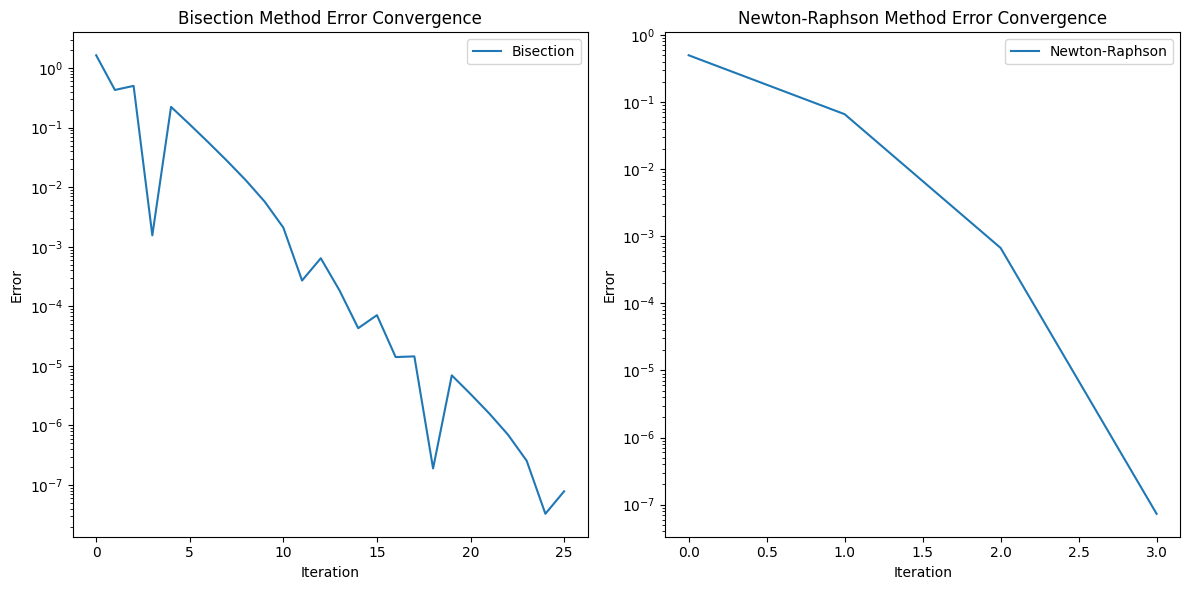

Bisection method root for M=1.5, e=0.9: 2.217997183548383
Newton-Raphson method root for M=1.5, e=0.9: 2.2179972027545016


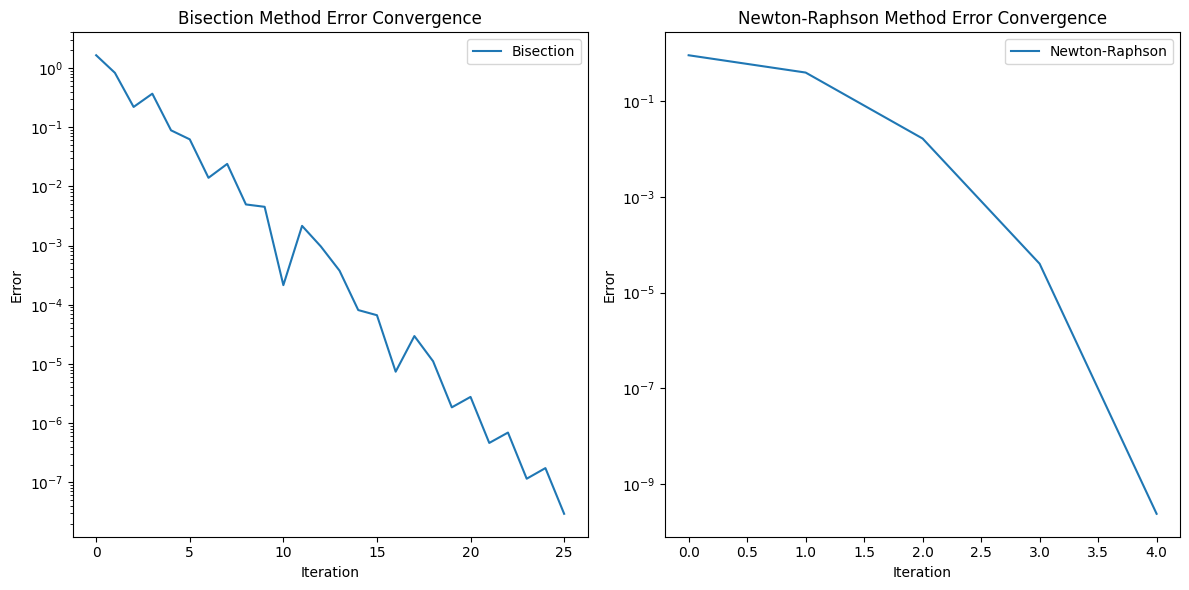

In [21]:
# Test Kepler's equation with M = 1.5, e = 0.5
errors_bisection, errors_newton = kepler_solver(1.5, 0.5)
plot_errors(errors_bisection, errors_newton)

# Test Kepler's equation with M = 1.5, e = 0.9
errors_bisection, errors_newton = kepler_solver(1.5, 0.9)
plot_errors(errors_bisection, errors_newton)

In [22]:
# Performance measurement for Kepler's equation
def measure_performance(M_values, e):
    """ Measure the performance of both methods for a range of M values. """
    bisection_times = []
    newton_times = []
    
    for M in M_values:
        # Bisection method
        start_time = time.time()
        bisection_method(kepler_f(M, e), 0, 2 * np.pi)
        bisection_times.append(time.time() - start_time)
        
        # Newton-Raphson method
        start_time = time.time()
        newton_raphson_method(kepler_f(M, e), kepler_df(e), M)
        newton_times.append(time.time() - start_time)
    
    return np.array(bisection_times), np.array(newton_times)

Total time for Bisection method: 0.372250 seconds
Total time for Newton-Raphson method: 0.132072 seconds


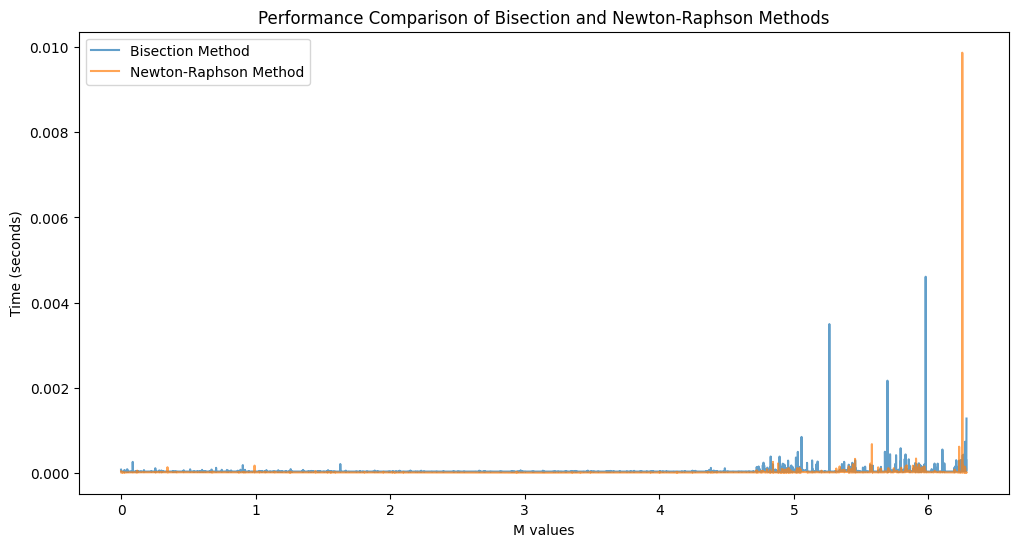

In [23]:
# Generate 10,000 equally spaced values of M
M_values = np.linspace(0, 2 * np.pi, 10000)
e = 0.9

# Measure performance
bisection_times, newton_times = measure_performance(M_values, e)

# Calculate and print total time for each method
total_bisection_time = np.sum(bisection_times)
total_newton_time = np.sum(newton_times)

print(f"Total time for Bisection method: {total_bisection_time:.6f} seconds")
print(f"Total time for Newton-Raphson method: {total_newton_time:.6f} seconds")

# Plot performance comparison
plt.figure(figsize=(12, 6))
plt.plot(M_values, bisection_times, label='Bisection Method', alpha=0.7)
plt.plot(M_values, newton_times, label='Newton-Raphson Method', alpha=0.7)
plt.xlabel('M values')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Bisection and Newton-Raphson Methods')
plt.legend()
plt.show()